In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans,AffinityPropagation,MeanShift
import os
import warnings
from threading import Thread

In [27]:
path='b.jpg'#'amsterdam-1920x1080-channel-4k-18504.jpg'

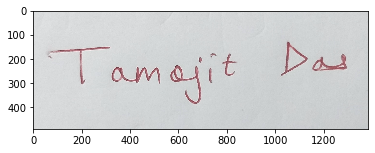

In [28]:
img=cv2.imread(path)
plt.imshow(img)

In [29]:
IMG_SIZE=20
img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
img.shape

(20, 20, 3)

In [30]:
new_img=img.reshape(-1,3)
new_img.shape

(400, 3)

In [31]:
def color(x):
    x=x%8
    if x==[0]:
        return [255,0,0]
    if x==[1]:
        return [0,255,0]
    if x==[2]:
        return [0,0,255]
    if x==[3]:
        return [255,255,0]
    if x==[4]:
        return [0,255,255]
    if x==[5]:
        return [255,0,255]
    if x==[6]:
        return [255,255,255]
    if x==[7]:
        return [0,0,0]


def Model_Cluster(model,new_img,IMG_SIZE):
    model.fit(new_img)
    
    for i in range(len(new_img)):
        new_img[i]=color(model.predict([new_img[i]]))
    new_img=new_img.reshape(IMG_SIZE,IMG_SIZE,3)
    #print("Model Custers: ",len(model.cluster_centers_))
    #plt.imshow(new_img)
    cv2.imwrite('Clustering_Img/{}-{}.jpg'.format(type(model).__name__,len(model.cluster_centers_)),new_img)
    
    

In [32]:
warnings.filterwarnings('ignore')

model_list=[
    KMeans(),
    AffinityPropagation(),
    MeanShift(),

]

thread_list=[]

for model in model_list:
    t1=Thread(target=Model_Cluster,args=(model,new_img,IMG_SIZE,))
    t1.start()
    thread_list.append(t1)

for i in thread_list:
    i.join()